In [21]:
import os
import xarray as xr
import re

# === Paths ===
maxtemp_folder = r"Data - Modelling\Region_Monthly_DB\1. Reg_Cropped_Separated\WET\Max Temp"
mintemp_folder = r"Data - Modelling\Region_Monthly_DB\1. Reg_Cropped_Separated\WET\Min Temp"
radiation_folder = r"Data - Modelling\Region_Monthly_DB\1. Reg_Cropped_Separated\WET\Radiation"
rainfall_folder = r"Data - Modelling\Region_Monthly_DB\1. Reg_Cropped_Separated\WET\Rainfall"
spi_folder = r"Data - Modelling\Region_Monthly_DB\1. Reg_Cropped_Separated\WET\SPI"
output_file = r"Data - Modelling\Region_Monthly_DB\2. Reg_Combined\WET_Combined_Labeled.nc"

# === List all files (ensure all folders have the same years) ===
years = sorted([
    re.search(r"\d{4}", f).group()
    for f in os.listdir(rainfall_folder)
    if f.endswith(".nc") and re.search(r"\d{4}", f)
])

# print(f"📂 Found {len(years)} years: {years}")

# === Initialize a list for combined datasets ===
datasets = []

# === Combine all variables year by year ===
for year in years:
    print(f"📂 Processing year: {year}")

    # === Load each variable ===
    ds_rain = xr.open_dataset(os.path.join(rainfall_folder, f"Monthly_WET_cropped_{year}.monthly_rain.nc"))
    ds_maxtemp = xr.open_dataset(os.path.join(maxtemp_folder, f"Monthly_WET_cropped_{year}.max_temp.nc"))
    ds_mintemp = xr.open_dataset(os.path.join(mintemp_folder, f"Monthly_WET_cropped_{year}.min_temp.nc"))
    ds_radiation = xr.open_dataset(os.path.join(radiation_folder, f"Monthly_WET_cropped_{year}.radiation.nc"))
    ds_spi = xr.open_dataset(os.path.join(spi_folder, f"SPI_Monthly_WET_cropped_{year}.monthly_rain.nc"))

    # === Align all datasets by lat, lon, time ===
    ds_combined = xr.merge([
        ds_rain["monthly_rain"],
        ds_maxtemp["max_temp"],
        ds_mintemp["min_temp"],
        ds_radiation["radiation"],
        ds_spi["spi_1"]
    ])

    # === Preserve region_code ===
    if "region_code" in ds_rain:
        ds_combined["region_code"] = ds_rain["region_code"]

    # === Preserve region_name ===
    if "region_name" in ds_rain:
        ds_combined["region_name"] = ds_rain["region_name"]


    # === Append to list ===
    datasets.append(ds_combined)

# === Concatenate all years into a single dataset ===
ds_combined = xr.concat(datasets, dim="time")
print(f"✅ Combined all years: {len(ds_combined.time)} months total.")

# === Save the combined dataset ===
ds_combined.to_netcdf(output_file)
print(f"✅ Saved combined dataset: {output_file}")


📂 Processing year: 2000
📂 Processing year: 2001
📂 Processing year: 2002
📂 Processing year: 2003
📂 Processing year: 2004
📂 Processing year: 2005
📂 Processing year: 2006
📂 Processing year: 2007
📂 Processing year: 2008
📂 Processing year: 2009
📂 Processing year: 2010
📂 Processing year: 2011
📂 Processing year: 2012
📂 Processing year: 2013
📂 Processing year: 2014
📂 Processing year: 2015
📂 Processing year: 2016
📂 Processing year: 2017
📂 Processing year: 2018
📂 Processing year: 2019
📂 Processing year: 2020
📂 Processing year: 2021
📂 Processing year: 2022
📂 Processing year: 2023
📂 Processing year: 2024
✅ Combined all years: 300 months total.
✅ Saved combined dataset: Data - Modelling\Region_Monthly_DB\2. Reg_Combined\WET_Combined_Labeled.nc



✅ Available Variables: ['monthly_rain', 'max_temp', 'min_temp', 'radiation', 'spi_1']


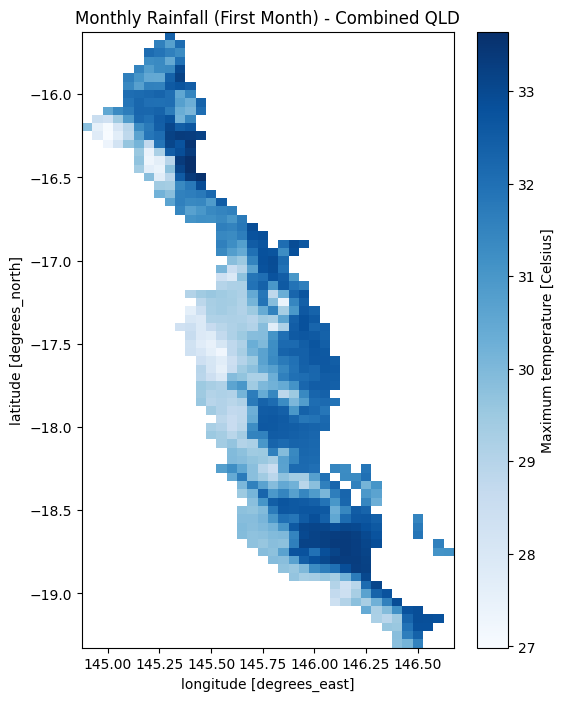

In [26]:
import xarray as xr
import matplotlib.pyplot as plt

# === Load the combined dataset ===
combined_file = r"Data - Modelling\Region_Monthly_DB\2. Reg_Combined\WET_Combined_Labeled.nc"  # Adjust the path if needed
ds_combined = xr.open_dataset(combined_file)

# === Check the available variables in the combined file ===
print("\n✅ Available Variables:", list(ds_combined.data_vars.keys()))

# === Selecting one of the variables (rainfall) ===
rainfall = ds_combined["max_temp"]  # Change to the variable you want to plot

# === Plotting a heatmap for the first month ===
plt.figure(figsize=(6, 8))
rainfall.isel(time=25).plot(cmap="Blues")  # First month
plt.title("Monthly Rainfall (First Month) - Combined QLD")
plt.show()
